In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_csv('used_cars_data.csv')

In [2]:
def get_ll_ul(data, column_name):
    q25 = data[column_name].quantile(0.25)
    q75 = data[column_name].quantile(0.75)
    iqr = q75 - q25

    lower_limit = q25- 1.5*iqr
    upper_limit = q75 + 1.5*iqr
    outliers = data[(data[column_name]<lower_limit) | (data[column_name]>upper_limit)]
    print(f"Lower Limit of {column_name}", lower_limit)
    print(f"Upper Limit of {column_name}", upper_limit)
    print(f"Number of outliers {column_name}", len(outliers))
    data.boxplot(column=[column_name]) 
    plt.show()
    return lower_limit, upper_limit, len(outliers), list(outliers.index)

In [3]:
del data['S.No.']
del data['New_Price']

In [4]:
data['Car_Age'] = data['Year'].apply(lambda x: datetime.now().year-x)

In [5]:
mileage = []
engine = []
power = []

for i, row in data.iterrows():
    
    if str(row['Mileage']).endswith('km/kg'):
        ## converting km/kg to kmpl
        mileage.append(float(str(row['Mileage']).split()[0])*1.4)
    elif str(row['Mileage']).endswith('kmpl'):
        mileage.append(float(str(row['Mileage']).split()[0]))
    else:
        mileage.append(float('nan'))
        
    if str(row['Engine']).lower().endswith('cc'):
        engine.append(int(row['Engine'].split()[0]))
    else:
        engine.append(float('nan'))
        
    if str(row['Power']).lower().endswith('bhp'):
        try: 
            power.append(float(row['Power'].split()[0]))
        except:
             power.append(float('nan'))
    else:
        power.append(float('nan'))

data['Mileage'] = mileage
data['Engine'] = engine
data['Power'] = power

Lower Limit of Car_Age 0.5
Upper Limit of Car_Age 20.5
Number of outliers Car_Age 58


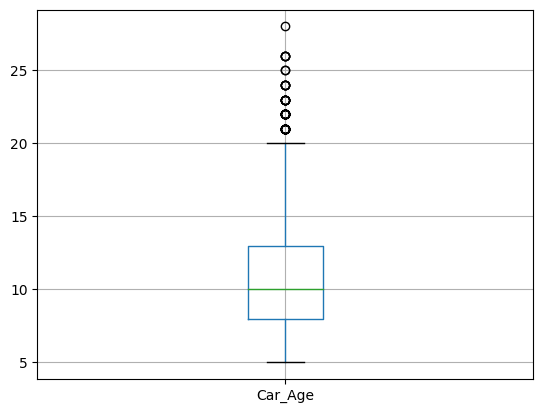

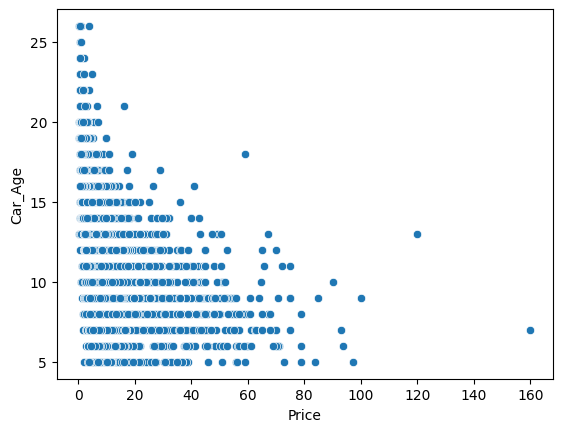

Correlation coffient:  PearsonRResult(statistic=-0.30532740836134836, pvalue=4.6171887258855255e-130)


In [6]:
# outliers in Car Age
lower_limit_age, upper_limit_age, number_of_outliers_age, outliers_index_age = get_ll_ul(data, "Car_Age")
sub_data = data[(~data['Car_Age'].isna()) & (~data['Price'].isna())]

sns.scatterplot(data=sub_data, x="Price", y="Car_Age")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(sub_data['Car_Age'], sub_data['Price']))

Lower Limit of Kilometers_Driven -24500.0
Upper Limit of Kilometers_Driven 131500.0
Number of outliers Kilometers_Driven 258


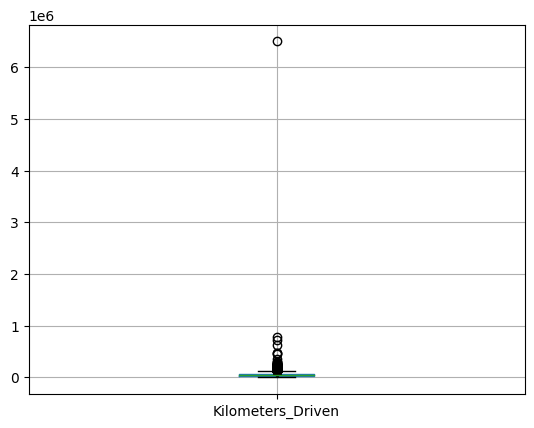

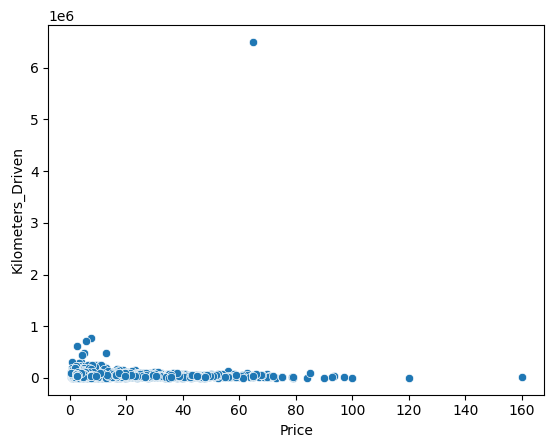

Correlation coffient:  PearsonRResult(statistic=-0.011492790740116172, pvalue=0.3726714985699097)


In [7]:
# Outliers in kilometers driven
lower_limit_driven, upper_limit_driven, number_of_outliers_driven, outliers_index_driven = get_ll_ul(data, "Kilometers_Driven")
sub_data = data[(~data['Kilometers_Driven'].isna()) & (~data['Price'].isna())]
sns.scatterplot(data=sub_data, x="Price", y="Kilometers_Driven")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(sub_data['Kilometers_Driven'], sub_data['Price']))

Lower Limit of Mileage 6.499999999999998
Upper Limit of Mileage 29.860000000000003
Number of outliers Mileage 133


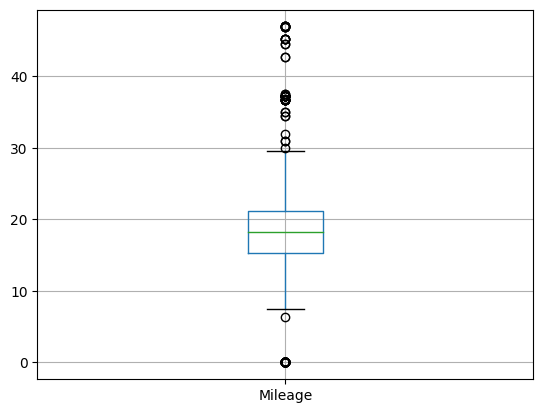

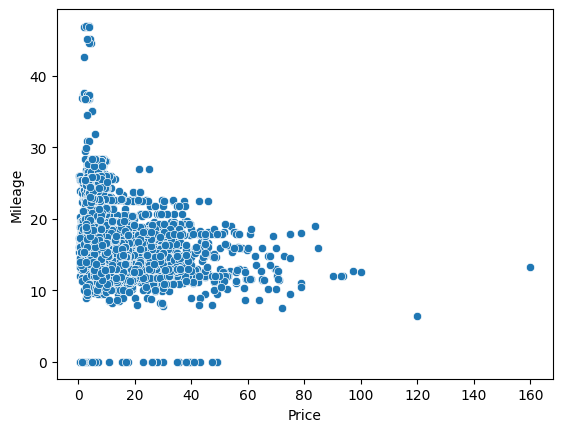

Correlation coffient:  PearsonRResult(statistic=-0.30007159602575084, pvalue=1.9483798114370013e-125)


In [8]:
#outliers in Mileage
lower_limit_mileage, upper_limit_mileage, number_of_outliers_mileage, outliers_index_mileage = get_ll_ul(data, "Mileage")
sub_data = data[(~data['Mileage'].isna()) & (~data['Price'].isna())]
sns.scatterplot(data=sub_data, x="Price", y="Mileage")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(sub_data['Mileage'], sub_data['Price']))

Lower Limit of Power -19.64999999999999
Upper Limit of Power 232.75
Number of outliers Power 273


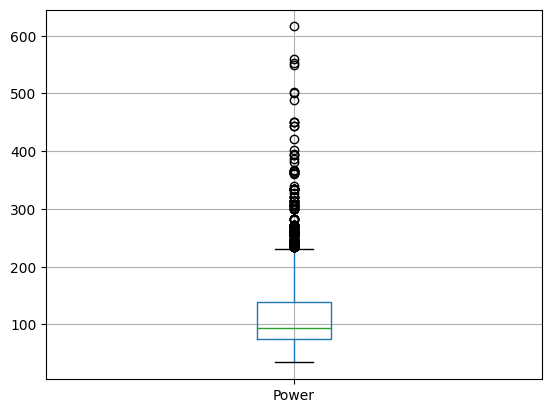

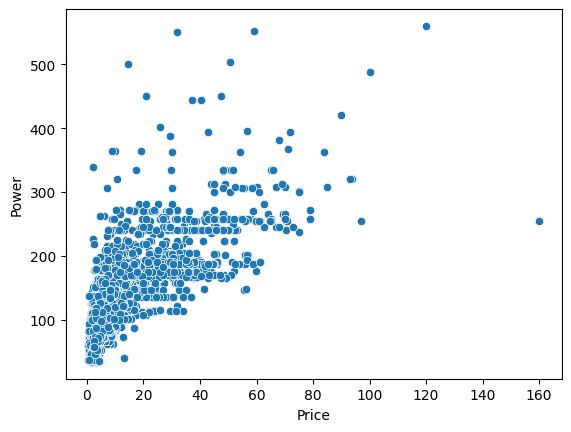

Correlation coffient:  PearsonRResult(statistic=0.7725658004912167, pvalue=0.0)


In [9]:
# outliers in Power
lower_limit_power, upper_limit_power, number_of_outliers_power, outliers_index_power = get_ll_ul(data, "Power")
sub_data = data[(~data['Power'].isna()) & (~data['Price'].isna())]
sns.scatterplot(data=sub_data, x="Price", y="Power")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(sub_data['Power'], sub_data['Price']))

Lower Limit of Seats 5.0
Upper Limit of Seats 5.0
Number of outliers Seats 1153


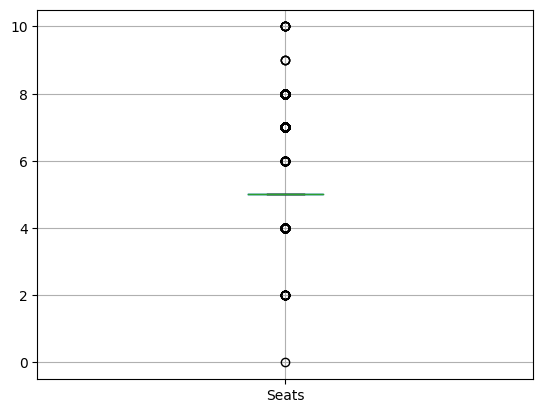

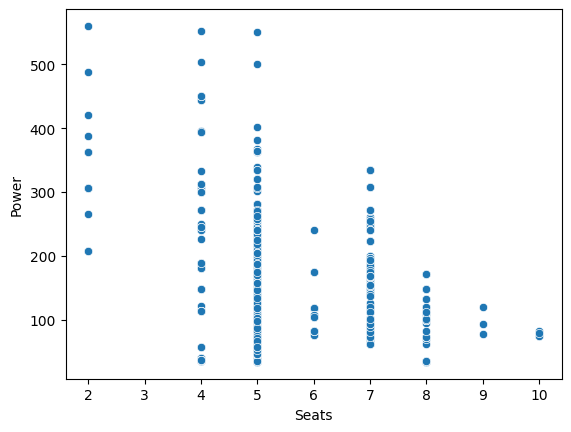

Correlation coffient:  PearsonRResult(statistic=0.05222544768179033, pvalue=5.3561406536466096e-05)
Lower Limit of Seats 5.0
Upper Limit of Seats 5.0
Number of outliers Seats 1152


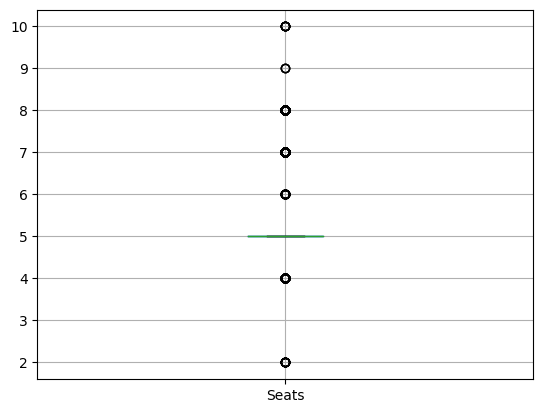

In [10]:
# outliers in Seats
lower_limit_seats, upper_limit_seats, number_of_outliers_seats, outliers_index_seats = get_ll_ul(data, "Seats")
sub_data = data[(~data['Seats'].isna()) & (~data['Price'].isna())]
sns.scatterplot(data=sub_data, x="Seats", y="Power")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(sub_data['Seats'], sub_data['Price']))


# looking at the seats a car can't 0 seats, so we can replace car with 0 seats with nan value 
data.loc[data['Seats']==0, 'Seats'] = float('nan')

lower_limit_seats, upper_limit_seats, number_of_outliers_seats, outliers_index_seats = get_ll_ul(data, "Seats")

In [11]:
number_of_rows = list(set(outliers_index_age + outliers_index_driven + outliers_index_mileage + outliers_index_power + outliers_index_seats))

print("Number of data with atleast one outlier", len(number_of_rows))

Number of data with atleast one outlier 1608


# Imputing missing values

# Since ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’ all these columns are continous features we impute the using mean or median values

# Mean-It is preferred if data is numeric and not skewed.
# Median-It is preferred if data is numeric and skewed.



In [12]:
print("Mean", data['Power'].mean())
print("Median", data['Power'].median())
print("Mode",data['Power'].mode()[0])
print("Skewness",data['Power'].skew())

Mean 112.76521404351512
Median 94.0
Mode 74.0
Skewness 1.9611776307277349


In [13]:
na_values_power = list(data[data['Power'].isna()].index)
print("Number of missing values", len(na_values_power))

Number of missing values 175


In [14]:
# mean is greater than median and mode, the data is right skewed so using median 
data['Power'] = data[['Fuel_Type', 'Transmission', 'Power']].groupby(['Fuel_Type', 'Transmission']).transform(lambda x: x.fillna(x.median()))

In [15]:
data[data['Power'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age


In [18]:
print("Mean", data['Seats'].mean())
print("Median", data['Seats'].median())
print("Mode",data['Seats'].mode()[0])
print("Skewness",data['Seats'].skew())

Mean 5.2804556188359495
Median 5.0
Mode 5.0
Skewness 1.9548877812669967


In [17]:
na_values_seats = list(data[data['Seats'].isna()].index)
print("Number of missing values", len(na_values_seats))

Number of missing values 54


In [18]:
# since mean , median and model are all close to each other we can use mean 
data['Seats'] = data[['Fuel_Type', 'Transmission', 'Seats']].groupby(['Fuel_Type', 'Transmission']).transform(lambda x: x.fillna(x.mean()))

In [19]:
data[data['Seats'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,imputed


In [20]:
print("Mean", data['Price'].mean())
print("Median", data['Price'].median())
print("Mode",data['Price'].mode()[0])
print("Skewness",data['Price'].skew())

Mean 9.47946835022429
Median 5.64
Mode 4.5
Skewness 3.3352319876668415


In [21]:
na_values_price = list(data[data['Price'].isna()].index)
print("Number of missing values", len(na_values_price))

Number of missing values 1234


In [22]:
# mean is greater than median and mode, the data is right skewed so using median 
data['Price'] = data[['Fuel_Type', 'Transmission', 'Price']].groupby(['Fuel_Type', 'Transmission']).transform(lambda x: x.fillna(x.median()))

In [23]:
data[data['Price'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,imputed


In [24]:
print("Mean", data['Engine'].mean())
print("Median", data['Engine'].median())
print("Mode",data['Engine'].mode()[0])
print("Skewness",data['Engine'].skew())

Mean 1616.5734702372692
Median 1493.0
Mode 1197.0
Skewness 1.4124125381446186


In [25]:
na_values_engine = list(data[data['Engine'].isna()].index)
print("Number of missing values", len(na_values_engine))

Number of missing values 46


In [26]:
# mean is greater than median and mode, the data is right skewed so using median 
data['Engine'] = data[['Fuel_Type', 'Transmission', 'Engine']].groupby(['Fuel_Type', 'Transmission']).transform(lambda x: x.fillna(x.median()))

In [27]:
data[data['Engine'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,imputed


In [29]:
print("Mean", data['Mileage'].mean())
print("Median", data['Mileage'].median())
print("Mode",data['Mileage'].mode()[0])
print("Skewness",data['Mileage'].skew())

Mean 18.240986346710798
Median 18.2
Mode 17.0
Skewness 0.19077332042450995


In [28]:
na_values_mileage = list(data[data['Mileage'].isna()].index)
print("Number of missing values", len(na_values_mileage))

Number of missing values 2


In [29]:
# since mean , median and model are all close to each other we can use mean 
data['Mileage'] = data[['Fuel_Type', 'Transmission', 'Mileage']].groupby(['Fuel_Type', 'Transmission']).transform(lambda x: x.fillna(x.mean()))

In [30]:
data[data['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,imputed
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,8,Not Imputed
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,13,Not Imputed


In [31]:
# mileage is not applicable for electric cars but for stats imputing with Automatic subclass
# since mean , median and model are all close to each other we can use mean 
data['Mileage'] = data[[ 'Transmission', 'Mileage']].groupby(['Transmission']).transform(lambda x: x.fillna(x.mean()))

In [32]:
data[data['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,imputed


# Outliers plot with with immuted data, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

Lower Limit of Mileage 6.499999999999998
Upper Limit of Mileage 29.860000000000003
Number of outliers Mileage 133


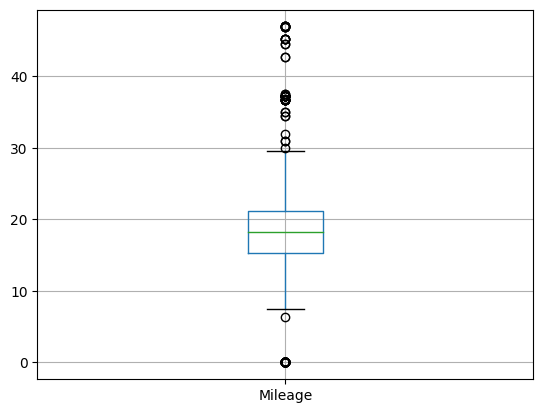

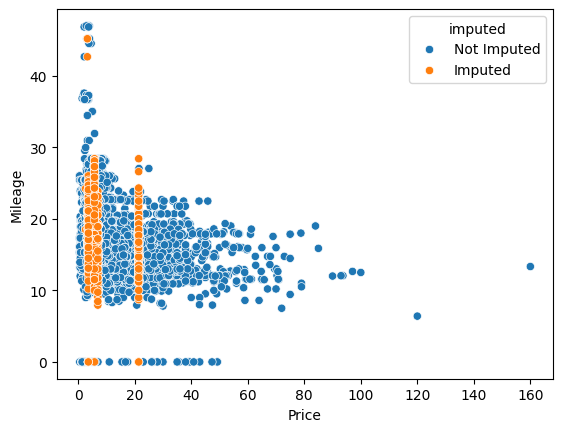

Correlation coffient:  PearsonRResult(statistic=-0.28652495051784493, pvalue=4.309559400075797e-137)


In [34]:
# Outliers in mileage
get_ll_ul(data, "Mileage")
data['imputed'] = "Not Imputed"
data.loc[data.index.isin(na_values_mileage + na_values_price), "imputed"] = "Imputed"
sns.scatterplot(data=data, x="Price", y="Mileage", hue="imputed")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(data['Mileage'], data['Price']))

Lower Limit of Engine 40.5
Upper Limit of Engine 3124.5
Number of outliers Engine 65


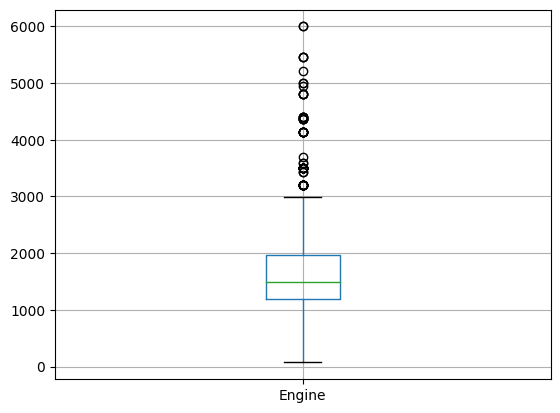

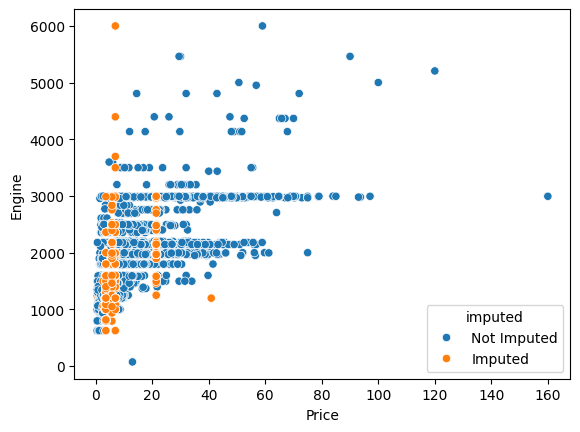

Correlation coffient:  PearsonRResult(statistic=0.6397472458302176, pvalue=0.0)


In [35]:
# Outliers in Engine
get_ll_ul(data, "Engine")
data['imputed'] = "Not Imputed"
data.loc[data.index.isin(na_values_engine + na_values_price), "imputed"] = "Imputed"
sns.scatterplot(data=data, x="Price", y="Engine", hue="imputed")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(data['Engine'], data['Price']))

Lower Limit of Power -14.545000000000002
Upper Limit of Power 229.575
Number of outliers Power 274


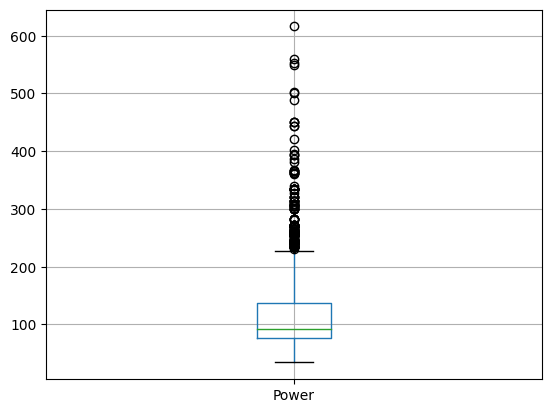

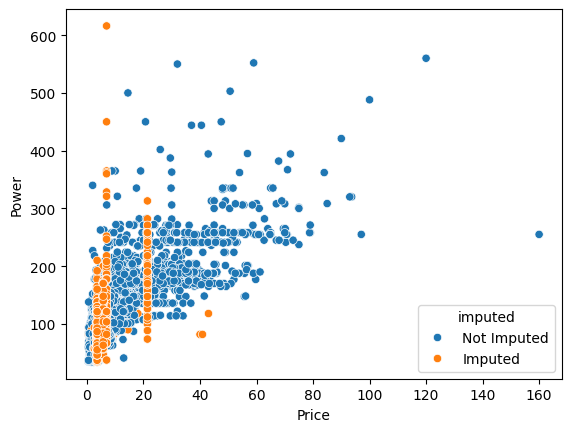

Correlation coffient:  PearsonRResult(statistic=0.7472833304249361, pvalue=0.0)


In [36]:
# Outliers in Power
get_ll_ul(data, "Power")
data['imputed'] = "Not Imputed"
data.loc[data.index.isin(na_values_power + na_values_price), "imputed"] = "Imputed"
sns.scatterplot(data=data, x="Price", y="Power", hue="imputed")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(data['Power'], data['Price']))

Lower Limit of Seats 5.0
Upper Limit of Seats 5.0
Number of outliers Seats 1206


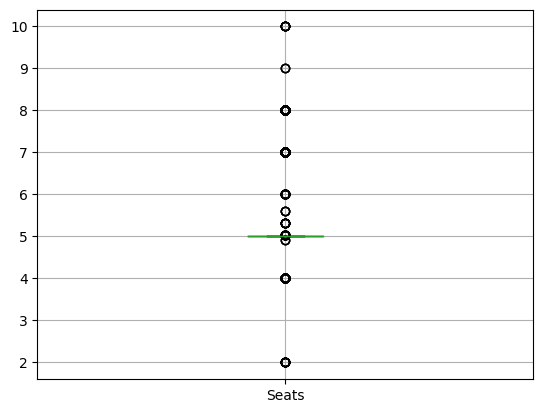

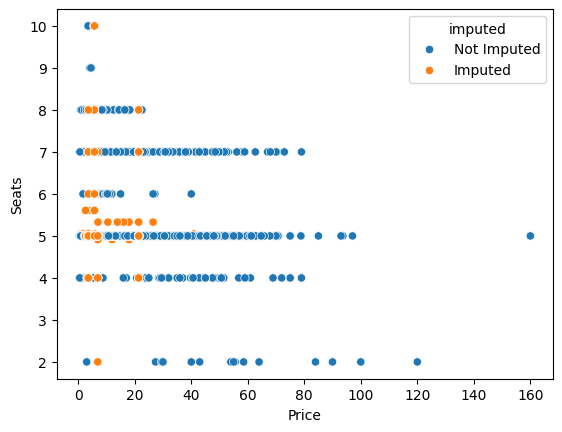

Correlation coffient:  PearsonRResult(statistic=0.049755234287985076, pvalue=2.2424059540733608e-05)


In [37]:
# Outliers in Seats
get_ll_ul(data, "Seats")
data['imputed'] = "Not Imputed"
data.loc[data.index.isin(na_values_seats+ na_values_price), "imputed"] = "Imputed"
sns.scatterplot(data=data, x="Price", y="Seats", hue="imputed")
plt.show()
print("Correlation coffient: ", scipy.stats.pearsonr(data['Seats'], data['Price']))